In [65]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
from math import ceil, cos, floor, log, pi, pow, sin, sqrt
from random import randint, seed, uniform

In [66]:
# Начальные значения
rho = 4.0
sigma = 3.0
P0 = np.array([0.0, 0.0])
E0 = np.array([6.0, 8.0])
l = 0.01

In [67]:
# Вспомогательные функции
def calc(d):
    n = ceil(log(d / l) / log(rho / sigma)) - 1
    return (d - l * pow(rho / sigma, n)) / (rho - sigma)

def normOfVector(A):
    return sqrt(abs(np.sum(A**2) - 1e-7))

def distance(A, B):
    return normOfVector(B - A)

def unitVector(A, B):
    U = B - A
    return U / normOfVector(U)

In [68]:
# Первое задание:
#    E : двигается с максимальной скорость вдоль луча P(0) E(0)
#    P : следует рекурсивной стратегии погонного приследования
def Task1(P0, E0, rho, sigma, l):
    P = P0.copy()
    E = E0.copy()
    d = distance(P, E)
    u = unitVector(P, E)
    T = 0
    h = 0.01
    
    # Плоскость для отрисовки
    fig, ax = plt.subplots(1, 3, figsize = (15, 5), sharex = True, sharey = True)
    ax[0].axis('off')
    ax[0].set_title('Траектория P')
    ax[1].axis('off')
    ax[1].set_title('Траектория E')
    ax[2].axis('off')
    ax[2].set_title('Траектория P и E')
    
    while d > l:
        t = calc(d)        
        # Рисуем пройденный путь
        N = floor(t / h) + 1
        PP = np.array([P + i * h * rho * u for i in range(N)])
        EE = np.array([E + i * h * sigma * u for i in range(N)])
        ax[0].plot(PP[:,0], PP[:,1], 'g')
        ax[1].plot(EE[:,0], EE[:,1], 'r')
        ax[2].plot(EE[:,0], EE[:,1], 'r')
        ax[2].plot(PP[:,0], PP[:,1], 'g')

        T += t
        P += t * rho * u
        E += t * sigma * u

        # Помечает расположение E и P в период t
        ax[0].plot(P[0], P[1], 'g.')
        ax[1].plot(E[0], E[1], 'r.')
        ax[2].plot(P[0], P[1], 'g.')  
        ax[2].plot(E[0], E[1], 'r*')          
        
        d = distance(P, E)
    
    print('Длительность: {0:.5f}'.format(T))
    
    # Пометим начальные точки
    ax[0].plot(P0[0], P0[1], color = 'limegreen', marker = '*')
    ax[1].plot(E0[0], E0[1], color = 'magenta', marker = '*')
    ax[2].plot(E0[0], E0[1], color = 'magenta', marker = '*')
    ax[2].plot(P0[0], P0[1], color = 'limegreen', marker = '*')

    # Пометим конечные точки
    ax[0].plot(P[0], P[1], color = 'limegreen', marker = 'D')
    ax[1].plot(E[0], E[1], color = 'magenta', marker = 'D')
    ax[2].plot(E[0], E[1], color = 'magenta', marker = 'D')
    ax[2].plot(P[0], P[1], color = 'limegreen', marker = 'D')

    plt.suptitle('Задание 1')
    plt.show()

In [69]:
# Данная функция используется как для второго задания так и для третьего:
# Отличаем этой функции от первой служат два параметра
#   chanceToChangeDirection - вероятность изменить направление Е в какой-то момент времени(Вероятность 50%)
#   chanceToMiss - вероятность P упустить цель
# Также есть вспомогательный параметр draw - который указывает надо ли рисовать траекторию
# chanceToChangeDirection и chanceToMiss используются для моделирования изменения траектории и
# эмуляции пропуска коррекции траектории
def Task23(P0, E0, rho, sigma, l, draw = True, chanceToMiss = 0.0, chanceToChangeDirection = 0.5):
    P = P0.copy()
    E = E0.copy()
    e_u = unitVector(P, E)
    d = distance(P, E)
    T = 0
    e_T = 0
    h = 0.01

    if draw:
        fig, ax = plt.subplots(1, 3, figsize = (15, 5), sharex = True, sharey = True)
        ax[0].axis('off')
        ax[0].set_title('Траектория P')
        ax[1].axis('off')
        ax[1].set_title('Траектория E')
        ax[2].axis('off')
        ax[2].set_title('Траектория P и E')
        
    while True:
        u = unitVector(P, E)
        t = calc(d)
        
        if draw:
            N = floor(t / h) + 1
            PP = np.array([P + i * h * rho * u for i in range(N)])
            ax[0].plot(PP[:,0], PP[:,1], 'g')
            ax[2].plot(PP[:,0], PP[:,1], 'g')
            
        T += t
        P += t * rho * u
        
        if draw:
            ax[0].plot(P[0], P[1], 'g.')
            ax[2].plot(P[0], P[1], 'g.')            
        
        d = distance(P, E)
        
        if d <= l:
            break

        # Моделируем изменение траектории для Е. Получаем случайное dt и для каждого
        # такого промежутка определяем менялось ли направление или нет.
        while e_T < T:
            dt = uniform(min(0.1, T - e_T), max(0.3, T - e_T))
            p = uniform(0, 1)
            
            if p <= chanceToChangeDirection:
                a = uniform(0, 2 * pi)
                # Случайное направление
                e_u = np.array([cos(a), sin(a)])
                
            if draw:
                N = floor(dt / h) + 1
                EE = np.array([E + i * h * sigma * e_u for i in range(N)])
                ax[1].plot(EE[:,0], EE[:,1], 'r')
                ax[2].plot(EE[:,0], EE[:,1], 'r')
                
            e_T += dt
            E += dt * sigma * e_u
            
            if draw:
                ax[1].plot(E[0], E[1], 'r.')
                ax[2].plot(E[0], E[1], 'r.')


        # Эмулируем вероятность потери объекта
        p = uniform(0, 1)
        # Если мы потеряли объект
        if p <= chanceToMiss:
            p_lag = uniform(0.02, 0.2)
            
            if draw:
                N = floor(p_lag / h) + 1
                PP = np.array([P + i * h * rho * u for i in range(N)])
                ax[0].plot(PP[:,0], PP[:,1], 'g')
                ax[2].plot(PP[:,0], PP[:,1], 'g')
            
            T += p_lag
            P += p_lag * rho * u
            
            if draw:
                ax[0].plot(P[0], P[1], 'g.')
                ax[2].plot(P[0], P[1], 'g.')   
            
            d = distance(P, E)

            
    if draw:
        # Пометим начальные точки
        ax[0].plot(P0[0], P0[1], color = 'limegreen', marker = '*')
        ax[1].plot(E0[0], E0[1], color = 'magenta', marker = '*')
        ax[2].plot(E0[0], E0[1], color = 'magenta', marker = '*')
        ax[2].plot(P0[0], P0[1], color = 'limegreen', marker = '*')

        # Пометим конечные точки
        ax[0].plot(P[0], P[1], color = 'limegreen', marker = 'D')
        ax[1].plot(E[0], E[1], color = 'magenta', marker = 'D')
        ax[2].plot(E[0], E[1], color = 'magenta', marker = 'D')
        ax[2].plot(P[0], P[1], color = 'limegreen', marker = 'D')

        if chanceToMiss == 0.0:
            plt.suptitle('Задание 2')
        else:
            plt.suptitle('Задание 3')
        plt.show()
        
    return T

In [70]:
def Task2(P0, E0, rho, sigma, l):
    # Тестовый пример с отрисовкой
    Task23(P0, E0, rho, sigma, l)
    
    T = []
    N = 20000
    for n in range(N):
        T.append(Task23(P0, E0, rho, sigma, l, False))
    T = np.array(T)
    
    plt.hist(T)
    plt.title('Гистограмма продолжительности игр для задания 2')
    plt.show()
    
    print('Средняя продолжительность игры: {:.5f}'.format(np.mean(T)))
    print('Отклонение: {:.5f}'.format(np.std(T)))
    
def Task3(P0, E0, rho, sigma, l, p = 0.0):
    # Тестовый пример с отрисовкой
    Task23(P0, E0, rho, sigma, l, True, p)
    
    T = []
    N = 20000
    for n in range(N):
        T.append(Task23(P0, E0, rho, sigma, l, False, p))
    T = np.array(T)
    
    plt.hist(T)
    plt.title('Гистограмма продолжительности игр для задания 3')
    plt.show()
    
    print('Средняя продолжительность игры: {:.5f}'.format(np.mean(T)))
    print('Отклонение: {:.5f}'.format(np.std(T)))

Длительность: 9.99000


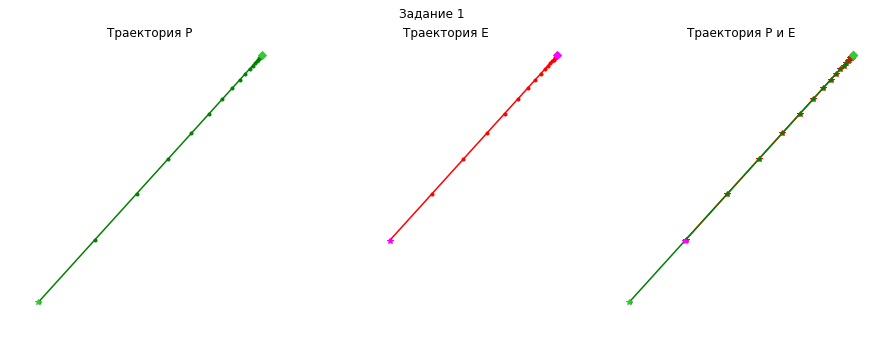

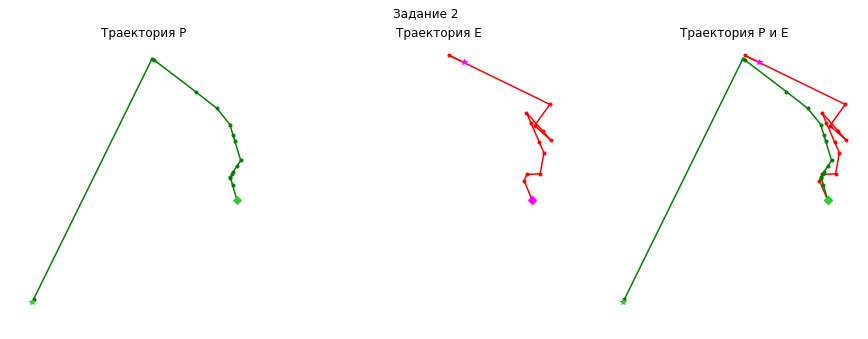

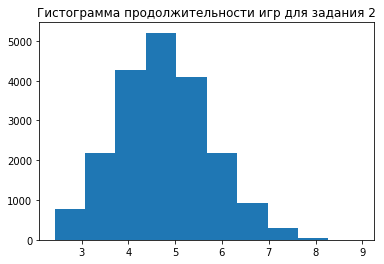

Средняя продолжительность игры: 4.75645
Отклонение: 0.98808


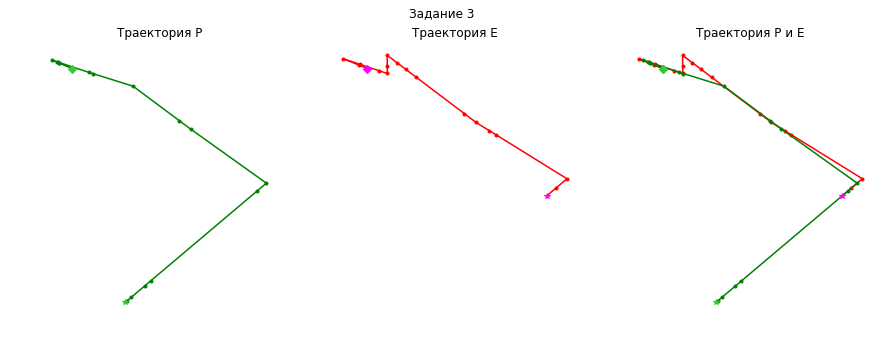

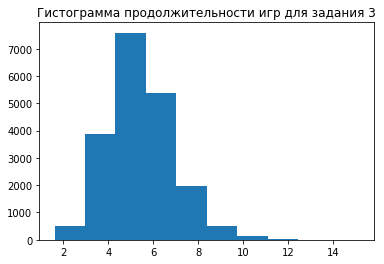

Средняя продолжительность игры: 5.44634
Отклонение: 1.45491


In [71]:
# Рандомизируем рандомайзер
seed(datetime.datetime.now().time())
Task1(P0, E0, rho, sigma, l);
Task2(P0, E0, rho, sigma, l)
Task3(P0, E0, rho, sigma, l, 0.25)